<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/Stock%20Market%20Prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df= pd.read_csv(r"/content/AAPL.csv")


In [6]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-06-25,0.370536,0.372768,0.359375,0.368304,0.294235,122001600
1,1990-06-26,0.372768,0.375000,0.360491,0.362723,0.289777,127254400
2,1990-06-27,0.363839,0.375000,0.359375,0.370536,0.296018,97227200
3,1990-06-28,0.381696,0.386161,0.372768,0.383929,0.306718,249939200
4,1990-06-29,0.383929,0.400670,0.381696,0.399554,0.319201,325192000


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1.shape

(8313,)

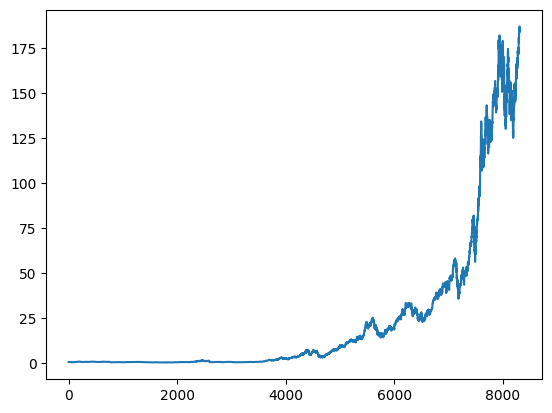

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
df1


0         0.368304
1         0.362723
2         0.370536
3         0.383929
4         0.399554
           ...    
8308    184.919998
8309    185.009995
8310    183.960007
8311    187.000000
8312    186.679993
Name: Close, Length: 8313, dtype: float64

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(8313, 1)

In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [15]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train)

[[0.00135266 0.0013228  0.0013646  ... 0.00107794 0.00111378 0.00110184]
 [0.0013228  0.0013646  0.00143627 ... 0.00111378 0.00110184 0.00114961]
 [0.0013646  0.00143627 0.00151987 ... 0.00110184 0.00114961 0.00110184]
 ...
 [0.0649801  0.06615921 0.06660448 ... 0.07150629 0.07103426 0.06990102]
 [0.06615921 0.06660448 0.06764408 ... 0.07103426 0.06990102 0.07133429]
 [0.06660448 0.06764408 0.06812375 ... 0.06990102 0.07133429 0.06951499]]


In [21]:
print(X_test.shape), print(ytest.shape)

(2809, 100)
(2809,)


(None, None)

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train, validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)


Epoch 1/10
83/83 [==============================] - 13s 114ms/step - loss: 4.2324e-05 - val_loss: 0.0053
Epoch 2/10
83/83 [==============================] - 9s 111ms/step - loss: 1.8449e-06 - val_loss: 0.0038
Epoch 3/10
83/83 [==============================] - 9s 111ms/step - loss: 1.9273e-06 - val_loss: 0.0054
Epoch 4/10
83/83 [==============================] - 14s 167ms/step - loss: 1.8036e-06 - val_loss: 0.0041
Epoch 5/10
83/83 [==============================] - 11s 136ms/step - loss: 1.6956e-06 - val_loss: 0.0037
Epoch 6/10
83/83 [==============================] - 11s 133ms/step - loss: 1.9430e-06 - val_loss: 0.0027
Epoch 7/10
83/83 [==============================] - 12s 143ms/step - loss: 1.8689e-06 - val_loss: 0.0033
Epoch 8/10
83/83 [==============================] - 10s 123ms/step - loss: 1.6382e-06 - val_loss: 0.0043
Epoch 9/10
83/83 [==============================] - 12s 146ms/step - loss: 1.8179e-06 - val_loss: 0.0037
Epoch 10/10
83/83 [==============================] - 10s 

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.15.0'

In [30]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

88/88 [==============================] - 2s 21ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

744.4878356957377

In [37]:
math.sqrt(mean_squared_error(ytest,test_predict))

13532.870788126822

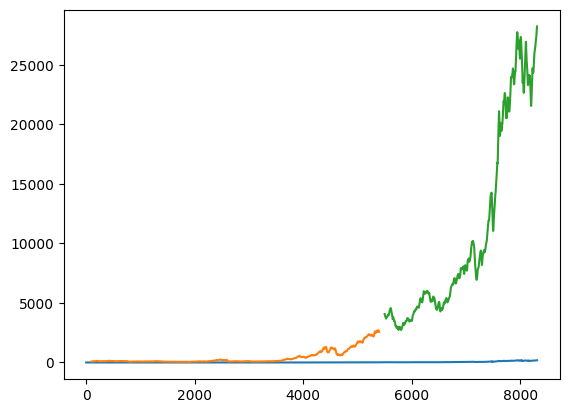

In [39]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:]= np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

2910

In [47]:
x_input=test_data[2810:].reshape(1,-1)
x_input.shape

(1, 100)

In [48]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [49]:
temp_input

[0.7714630695912177,
 0.777563094362134,
 0.8064045144635252,
 0.8260957850396646,
 0.8112737736225265,
 0.8268983877725495,
 0.8122904551194771,
 0.8066719951988309,
 0.807421121047891,
 0.8226177328458515,
 0.8191396003885544,
 0.8305370418466034,
 0.8218686123476904,
 0.8156615481947413,
 0.793883352126493,
 0.7961842814700826,
 0.798806168432803,
 0.7844123198946951,
 0.7908868594320512,
 0.7881579330872979,
 0.7769210132460058,
 0.7801315847045132,
 0.8075281604299238,
 0.8225106934638187,
 0.8105782102716744,
 0.8173737930425439,
 0.8051737488516102,
 0.7939903915085258,
 0.8045316677354819,
 0.8158755466953231,
 0.8180159544221559,
 0.8333195306895644,
 0.8287712345005929,
 0.8416133598076548,
 0.8516730765352397,
 0.8439142891512446,
 0.8498002298071964,
 0.8568634538403394,
 0.8463221776133832,
 0.842951084538119,
 0.8596459426833004,
 0.8681538559163555,
 0.8817451017215784,
 0.8885407647559318,
 0.8856513167944219,
 0.875645082301561,
 0.880460939489322,
 0.866388048570345,


In [50]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8114926]
101
1 day input [0.77756309 0.80640451 0.82609579 0.81127377 0.82689839 0.81229046
 0.806672   0.80742112 0.82261773 0.8191396  0.83053704 0.82186861
 0.81566155 0.79388335 0.79618428 0.79880617 0.78441232 0.79088686
 0.78815793 0.77692101 0.78013158 0.80752816 0.82251069 0.81057821
 0.81737379 0.80517375 0.79399039 0.80453167 0.81587555 0.81801595
 0.83331953 0.82877123 0.84161336 0.85167308 0.84391429 0.84980023
 0.85686345 0.84632218 0.84295108 0.85964594 0.86815386 0.8817451
 0.88854076 0.88565132 0.87564508 0.88046094 0.86638805 0.85980646
 0.85606085 0.88527672 0.88340395 0.88351091 0.89014605 0.89635311
 0.89110917 0.88238726 0.88404603 0.87569864 0.87564508 0.90052681
 0.90732239 0.90684083 0.90122237 0.89538991 0.8865074  0.92813746
 0.92776286 0.91850583 0.92808391 0.92910059 0.92278657 0.92011112
 0.92011112 0.92342865 0.93605677 0.93664538 0.93150848 0.91738211
 0.91888035 0.92503393 0.93809006 0.9480963  0.94782874 0.96302527
 0.96762705 0.96029634 0.95831653 0

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

8313

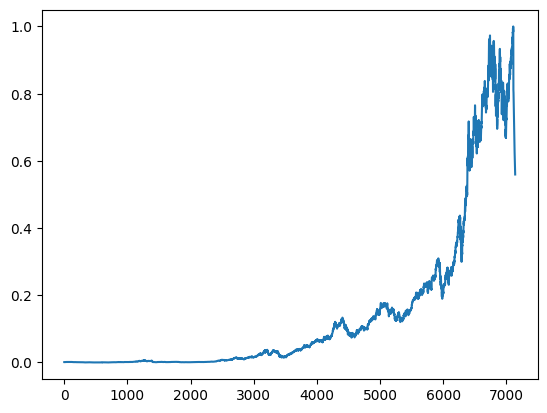

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

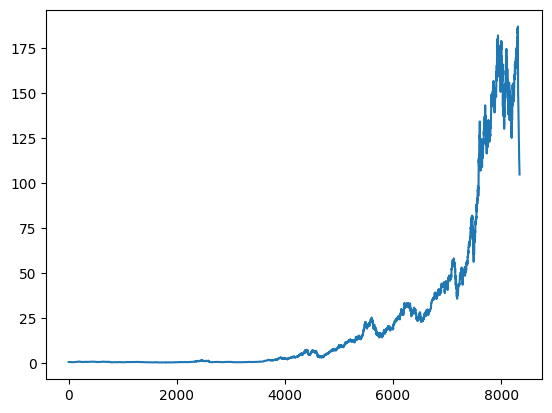

In [59]:
plt.plot(df3)